# Assignment 2:

In this assignment, you are going to solve three problems: 

1. Improving Nearest Neighbors Retrieval Speed (8 points)
2. Gaussian Naive Bayes (4 points)
3. PCA (3 points)

## 1. Improving Nearest Neighbors Retrieval Speed (8 points)

You are given a dataset of coordinates and information about places around the globe. Explore the dataset. You will be mostly working with 2d vectors which represent longitude and latitude.

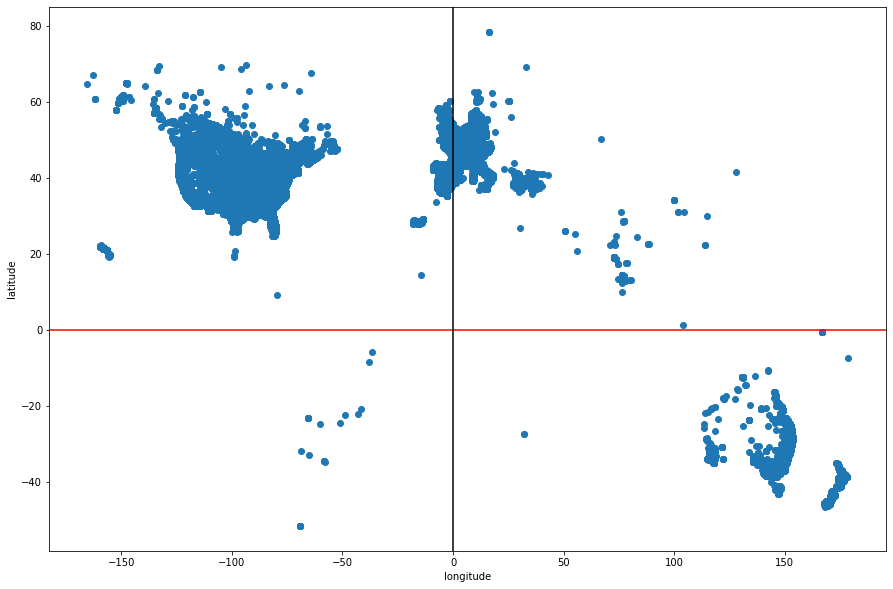

In [259]:
import pickle
import matplotlib.pyplot as plt

with open("poi_sample001.pickle", "rb") as f:
    dataset = pickle.load(f)
    
X = [v[0][0] for v in dataset]
Y = [v[0][1] for v in dataset]

plt.figure(figsize=(15, 10))
a = plt.axes()
a.set_xlabel('longitude')
a.set_ylabel('latitude')
plt.axhline(0, color='red')
plt.axvline(0, color='black')
plt.scatter(X, Y)
plt.show()

### 1.1 Simple NN Search

Implement the simplest form of NN search (exhaustive search).
Your function should: 
1. Calculate the distance between the test point and each dataset point using euclidean distance.
2. Sort the dataset according to calculated distance in ascending order.
3. Return the top K points from the sorted dataset.

You need to implement this from scratch. Don't use library solutions. 
It is okay to use library function for eucliden distance.

In [260]:
import numpy as np

def simple_nns(v, data, k):
    """
    param: v: test point
    param: data: dataset
    param: k: number of nearest neighbors to retrive
    return: list of nearest points from the dataset
    """
    # implement simple NN Search

    nearest_neighbours = list()
    
    origin = np.array(v)
    """
      Simple exhaustive NN search. We are calculating distance between point of origin and the rest.
      Then, we sort them by ascending order(based on the distance)
      Finally, we return K closest points.
    """
    for current_point in data:      
      dist = np.linalg.norm(origin - np.array(current_point))
      nearest_neighbours.append((dist, current_point))      

    
    return sorted(nearest_neighbours)[:k]


In [261]:
all = [v[0] for v in dataset]

Find the first 100 nearest neighbors of Paris. However, we are only interested in shops. Filter out everything that doesn't contain 'Shop' substring in the description and plot the remaining points.

In [262]:
# Creating list of shops
shops = list()
# Getting the list of shops
for point in dataset:
  if ('Shop' in point[1]):    
    shops.append(point[0])
# Renaming this to all so that we could plot it later
X_all = [v[0][0] for v in dataset]
Y_all = [v[0][1] for v in dataset]


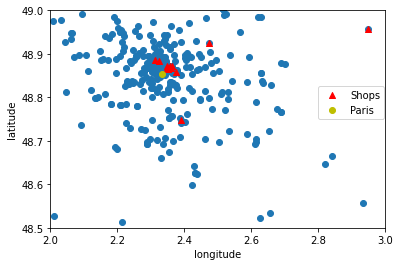

In [263]:
paris = [2.334083, 48.853260]

# find and plot the nearest neighbors according to the above instructions
paris_nn = simple_nns(paris, shops, 100)
paris_nn = list(x[1] for x in paris_nn)

# Get longitude(X) and Lattitude(Y)
X = [v[0] for v in paris_nn]
Y = [v[1] for v in paris_nn]

a = plt.axes()
a.set_xlabel('longitude')
a.set_ylabel('latitude')

"""
  Plotting the data.
  Red triangles are shops, and the yellow dot is Paris itself.
"""
plt.scatter(X_all, Y_all)
plt.scatter(X, Y, c = [[1, 0, 0]], marker = "^", label = 'Shops')
plt.scatter(paris[0], paris[1], c = 'y', label = 'Paris')
plt.legend(loc = (0.8, 0.5))

# axes limits are set for better visualization, don't change them
plt.ylim(48.5, 49)
plt.xlim(2,3)
plt.show()

Measure retrieval time of `simple_nns` for every given number of nearest neighbors. Every time select some random point from the dataset. Plot the results.

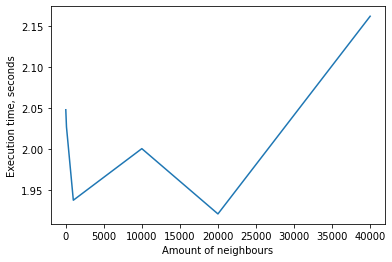

In [264]:
import time
import random
# numbers of nearest neghbors to retrieve
nns = [10, 100, 1000, 10000, 20000, 40000]

# measure retrival time for every value above and save it somewhere 
time_needed = list()

for i in nns:  
  start_time = time.time()
  simple_nns(random.choice(all), all, i)
  time_needed.append(time.time() - start_time)

# plot the results
plt.plot(nns, time_needed)
plt.xlabel('Amount of neighbours')
plt.ylabel('Execution time, seconds')
plt.show()


What do you observe? Do you see any trends, how can you explain them?

<span style="color:blue"> Your answer: Although the execution time flunctuates, it stays more or less the same. Since our exhaustive search does not depend on the number of Ks, it has roughly the same execution time</span>

### 1.2 Improving NNS

Choose any method you like to speed up NN search, understand it thoroughly and learn how to apply it. Explain the way it works in few sentences and in your own words.

<span style="color:blue"> Your answer: Ball Tree approach is based on partitioning the space with hyperlanes. This speeds improvement as we ignore some branches in a tree(space partitions that are unlikely to contain a nearest neghbour)
Ball tree functions as follows: each node’s points are assigned to the closest center of the node’s two children. Children are chosen so that the distance between them will be maximized. Then, the resulting partition would be finding hyperlanes that are perpendicular to the lines that connect two children's centers.
</span>

Apply the chosen method on the geographic dataset. Similarly to the above, find the nearest neighbors and plot retrieval times.

In [265]:
# apply the chosen method
from sklearn.neighbors import BallTree

nbrs = BallTree(np.array(shops))



Find the first 100 nearest neighbors of Paris. However, we are only interested in shops. Filter out everything that doesn't contain 'Shop' substring in the description and plot the remaining points.

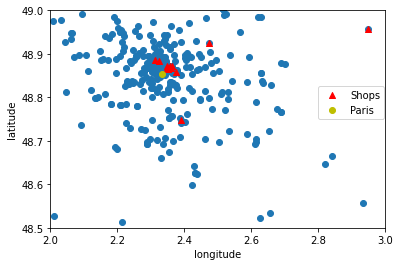

In [266]:
paris = [2.334083, 48.853260]

# find and plot the nearest neighbors according to the above instructions
ind = nbrs.query(np.array([paris]), k = 100, return_distance=False)

paris_nn = list()

for index in ind[0]:
  paris_nn.append(shops[index])

X = [v[0] for v in paris_nn]
Y = [v[1] for v in paris_nn]

a = plt.axes()
a.set_xlabel('longitude')
a.set_ylabel('latitude')
plt.scatter(X_all, Y_all)
plt.scatter(X, Y, c = [[1, 0, 0]], marker = "^", label = 'Shops')
plt.scatter(paris[0], paris[1], c = 'y', label = 'Paris')
plt.legend(loc = (0.8, 0.5))


# axes limits are set for better visualization, don't change them
plt.ylim(48.5, 49)
plt.xlim(2,3)
plt.show()

Measure retrieval time of `simple_nns` for every given number of nearest neighbors. Every time select some random point from the dataset. Plot the results.

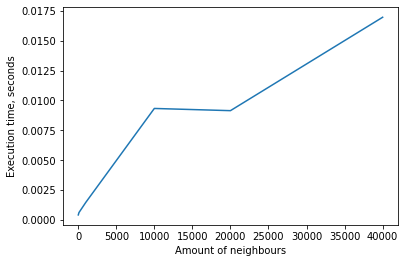

In [267]:
nbrs = BallTree(np.array(all))
# numbers of nearest neghbors to retrieve
nns = [10, 100, 1000, 10000, 20000, 40000]

# measure retrival time for every value above and save it somewhere 
time_needed_optimal = list()

for i in nns:  
  start_time = time.time()  
  nbrs.query([random.choice(all)], k=i)
  time_needed_optimal.append(time.time() - start_time)

# plot the results
# print(time_needed_optimal)
plt.plot(nns, time_needed_optimal)
plt.xlabel('Amount of neighbours')
plt.ylabel('Execution time, seconds')
plt.show()


What do you observe? Do you see any trends, how can you explain them?

<span style="color:blue"> Your answer: </span>

### 1.3 Comparison

Plot retrieval times together in the same plot. If time difference is big (as it should be), use a logarithmic scale for better visualization. If you don't achieve any time improvements, then you are doing something wrong.

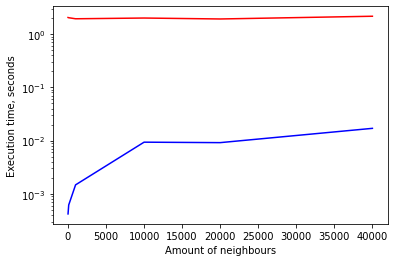

In [268]:
# plot retrieval times together

plt.plot(nns, time_needed, 'r')
plt.plot(nns, time_needed_optimal, 'b')
plt.xlabel('Amount of neighbours')
plt.ylabel('Execution time, seconds')
plt.yscale('log')
plt.show()


Analyze the results and summarise them here. 

<span style="color:blue"> Your answer: Optimization methods accelerate</span>

## 2. Gaussian Naive Bayes (4 points)

Finish the implementation of Gaussian NB.

In [269]:
def mean(column):
    return np.mean(column)

In [270]:
class GaussianNB:
    def fit(self, X_train, y_train):
        """
        fit classifier, i.e. calculate needed statistics
        """
        ### START CODE HERE ###
        self.prior = list()
        self.means = list()
        self.std = list()

        for i in np.arange(3):
          indices = np.where(y_train == i)
          self.prior.append((np.count_nonzero(y_train[indices] == i) / len(y_train[indices])))
          self.means.append(np.apply_along_axis(np.mean, 0, X_train[indices]))
          self.std.append(np.apply_along_axis(np.std, 0, X_train[indices]))

        # print("Priors:", self.prior)
        # print("Means:", self.means)
        # print("Standard deviation", self.std)
        
        ### END CODE HERE ###
        
    def predict(self, X_test):
        """
        predict class labels for test data points
        param: test_data: list of data points to be classified
        return: predictions (class labels)
        """
        ### START CODE HERE ###        
        self.predictions = list()

        for test_point in X_test:
          
          posterior = [(np.prod((np.exp(-((test_point - self.means[i]) ** 2) / (2 * self.std[i] ** 2)) / np.sqrt(np.pi * (self.std[i] ** 2) * 2))) * self.prior[i]) for i in np.arange(3)]
          
          prediction = np.argmax(posterior)
          self.predictions.append(prediction)
        
        ### END CODE HERE ###
        
        return self.predictions

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


# You should get the accuracy score not less than 90%.
print(accuracy_score(y_test, y_pred))

0.9666666666666667


## 3. PCA

Apply PCA to the Digits dataset, produce the scree plot for the given data and decide the optimal number of PCs to keep. Calculate and print their total explained variance.

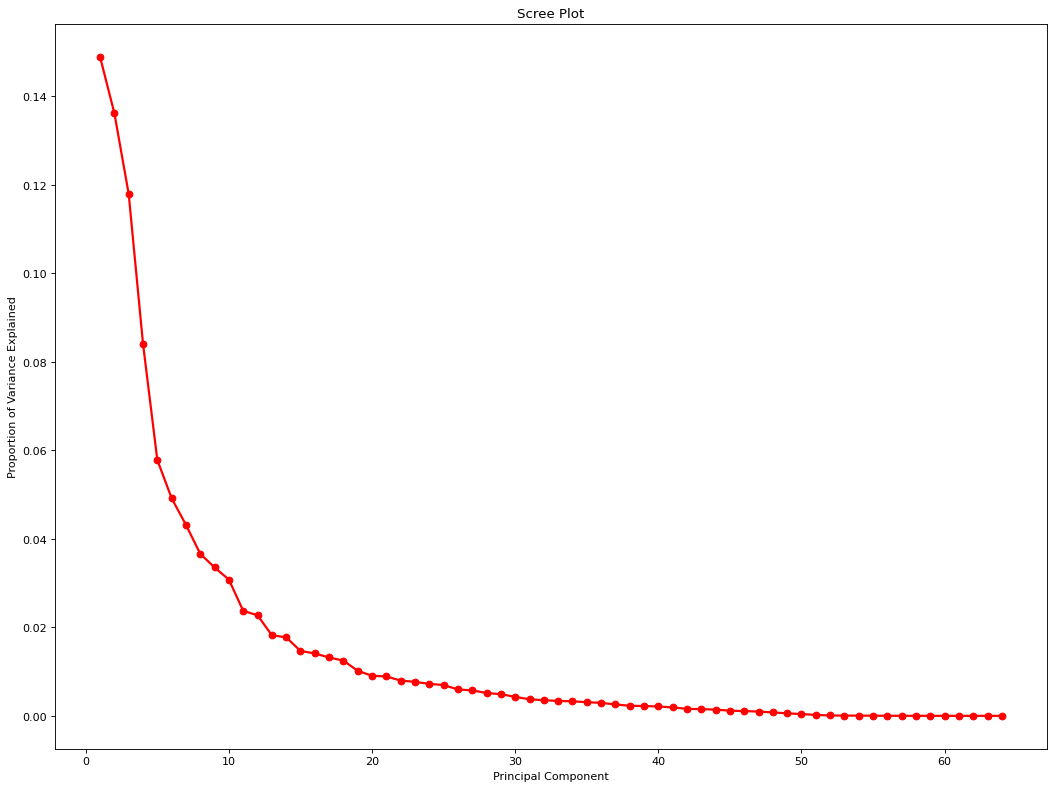

16.94686385271153


In [272]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

X, y = load_digits(return_X_y=True)
pca = PCA()

# apply PCA
principal_components=pca.fit_transform(X)


# make scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# choose the number PCs and calculate and print their total explained variance

#PC - 15

print(pca.explained_variance_[15])

Thoroughly justify your choice - this is the main part of the work for this task.

<span style="color:blue"> Your answer: Since we are following elbow method, number of principal components should be 15. Should we choose more,  diminishing returns would be no longer worth the additional cost, as explained variance starts to drop in a linear fashion. </span>